# Ensemble Learning

## Initial Imports

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

## Read the CSV and Perform Basic Data Cleaning

In [34]:
# Load the data
file_path = 'Resources/LoanStats_2019Q1.csv'
loan_stats = pd.read_csv(file_path)

# Preview the data
loan_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68817 entries, 0 to 68816
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   68817 non-null  float64
 1   int_rate                    68817 non-null  float64
 2   installment                 68817 non-null  float64
 3   home_ownership              68817 non-null  object 
 4   annual_inc                  68817 non-null  float64
 5   verification_status         68817 non-null  object 
 6   issue_d                     68817 non-null  object 
 7   loan_status                 68817 non-null  object 
 8   pymnt_plan                  68817 non-null  object 
 9   dti                         68817 non-null  float64
 10  delinq_2yrs                 68817 non-null  float64
 11  inq_last_6mths              68817 non-null  float64
 12  open_acc                    68817 non-null  float64
 13  pub_rec                     688

## Split the Data into Training and Testing

In [35]:
# # Create our features
X = loan_stats.drop(columns='loan_status')
X = pd.get_dummies(X)

# # Create our target
y = loan_stats['loan_status']
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [36]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,issue_d_Mar-2019,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.177238,1.0,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660,1.0,1.0
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.381873,0.0,0.329446,0.329446,0.486161,0.486161,0.346637,0.346637,0.0,0.0
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.0
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [37]:
# Check the balance of our target values
Counter(y)

Counter({1: 68470, 0: 347})

In [38]:
# Split the X and y into X_train, X_test, y_train, y_test
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=1,
)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [39]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [40]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train_unscaled)

In [41]:
# Scale the training and testing data
X_train = X_scaler.transform(X_train_unscaled)
X_test = X_scaler.transform(X_test_unscaled)

In [42]:
# Create a helper function to visualize the confusion matrices
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=['High Risk', 'Low Risk'])
    disp.plot()
    plt.show()

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [43]:
# Resample the training data with the BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=1)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)

In [44]:
# Calculate the balanced accuracy score
balanced_accuracy_score(y_test, y_pred_brf)

0.7688604483694395

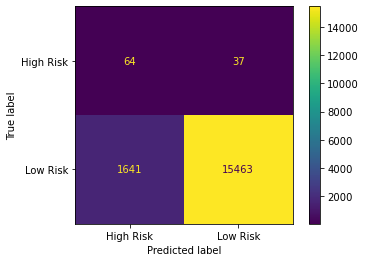

In [45]:
# Display the confusion matrix
plot_confusion_matrix(y_test, y_pred_brf)

In [46]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.04      0.63      0.90      0.07      0.76      0.56       101
          1       1.00      0.90      0.63      0.95      0.76      0.59     17104

avg / total       0.99      0.90      0.64      0.94      0.76      0.59     17205



In [47]:
# List the features sorted in descending order by feature importance
sorted(zip(brf.feature_importances_, X_test_unscaled.columns), reverse=True)


[(0.06862801182224613, 'total_rec_prncp'),
 (0.06038649619780159, 'total_rec_int'),
 (0.05905244774386602, 'total_pymnt'),
 (0.05863524144816048, 'total_pymnt_inv'),
 (0.055623377348809976, 'last_pymnt_amnt'),
 (0.030111484922129554, 'int_rate'),
 (0.01777359484825545, 'issue_d_Jan-2019'),
 (0.017520298295269406, 'dti'),
 (0.017336389337338155, 'installment'),
 (0.017239635318930423, 'mths_since_recent_inq'),
 (0.016079131330976076, 'out_prncp'),
 (0.01592943577126096, 'max_bal_bc'),
 (0.015333421064256041, 'out_prncp_inv'),
 (0.015133945030032623, 'mo_sin_old_rev_tl_op'),
 (0.014958790682464035, 'revol_bal'),
 (0.014473955358829452, 'avg_cur_bal'),
 (0.014369098673870841, 'total_bal_ex_mort'),
 (0.014247071880986605, 'tot_hi_cred_lim'),
 (0.014194503248174256, 'issue_d_Mar-2019'),
 (0.014188118477587585, 'annual_inc'),
 (0.014131045713741129, 'mths_since_rcnt_il'),
 (0.01394754842726268, 'bc_open_to_buy'),
 (0.013638285505964695, 'bc_util'),
 (0.013520145899029239, 'total_bal_il'),
 (

### Easy Ensemble Classifier

In [52]:
# Train the Classifier
ee = EasyEnsembleClassifier(random_state=1)
ee.fit(X_train, y_train)
y_pred_ee = ee.predict(X_test)

In [53]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred_ee)

0.9154459266085636

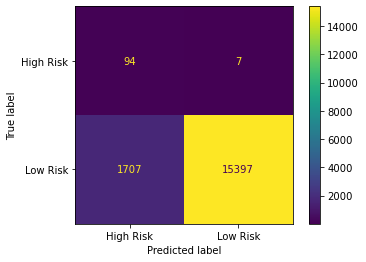

In [54]:
# Display the confusion matrix
plot_confusion_matrix(y_test, y_pred_ee)

In [55]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_ee))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.05      0.93      0.90      0.10      0.92      0.84       101
          1       1.00      0.90      0.93      0.95      0.92      0.84     17104

avg / total       0.99      0.90      0.93      0.94      0.92      0.84     17205



### Final Questions

1. Which model had the best balanced accuracy score?

    The Easy Ensemble model had the highest balanced accuracy score at `0.9154459266085636`.

2. Which model had the best recall score?

    Both models scored the same on recall at `0.90`.

3. Which model had the best geometric mean score?

    The Easy Ensemble model had the highest geometric mean score at `0.92`.

4. What are the top three features?

    `total_rec_prncp`, `total_rec_int`, and `total_pymnt` were the three most important features.